In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

mpl.rcParams.update(rcParams)

# Couple - régime

In [2]:
def load(filename: str):
    return pd.read_csv(filename, header=None, skiprows=1)

In [3]:
mesure1 = load("../data/couple-regime1.csv")
mesure2 = load("../data/couple-regime2.csv")

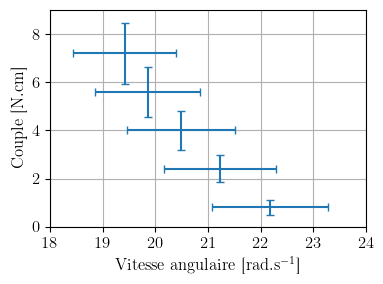

In [4]:
# mesures = pd.concat([mesure1, mesure2])
mesures = mesure1[np.arange(0, len(mesure1))%2 == 1]

couple = unp.uarray(mesures[1], mesures[1]*0.15 + 0.05)*r_disque

w = unp.uarray(mesures[0], mesures[0]*0.05)*2*np.pi/60

plt.errorbar(unp.nominal_values(w), unp.nominal_values(couple), unp.std_devs(couple), unp.std_devs(w), fmt=',')

plt.xlim(18,24)
plt.ylim(0.0, 9)

plt.ylabel(r"Couple [N.cm]")
plt.xlabel(r"Vitesse angulaire [rad.s$^{-1}$]")
plt.grid()
plt.tight_layout()
plt.savefig("../figures/couple-regime.pdf")


# Rendement - régime

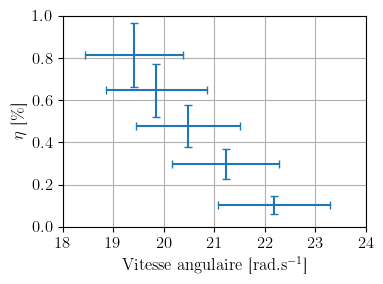

In [8]:
# mesures_exp2 = pd.concat([mesure1, mesure2])
mesures_exp2 = mesures

w2 = unp.uarray(mesures_exp2[0], mesures_exp2[0]*0.05)*2*np.pi/60
F = unp.uarray(mesures_exp2[1], mesures_exp2[1]*0.15 + 0.05)


Pm = w2*F*r_disque*0.01

Ufil = ufloat(13.41, 0.05)
Ifil = ufloat(12.82, 0.05)
phi2 = Ufil*Ifil

rend = Pm/phi2

plt.errorbar(unp.nominal_values(w2), unp.nominal_values(rend)*100, unp.std_devs(rend) * 100, unp.std_devs(w2), fmt=',')

plt.xlim(18,24)
plt.ylim(0, 1)

plt.ylabel(r"$\eta$ [\%]")
plt.xlabel(r"Vitesse angulaire [rad.s$^{-1}$]")
plt.grid()
plt.tight_layout()
plt.savefig("../figures/rendement-regime.pdf")